In [44]:
import pandas as pd

In [45]:
import numpy as np

In [46]:
# df = data.copy()

data = pd.read_csv("Iris.csv")

In [47]:
df = data.copy()

In [48]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Lets Check for anomalies if any

In [49]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [51]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Lets visualize the data

In [53]:
# !pip install matplotlib
!pip install seaborn


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

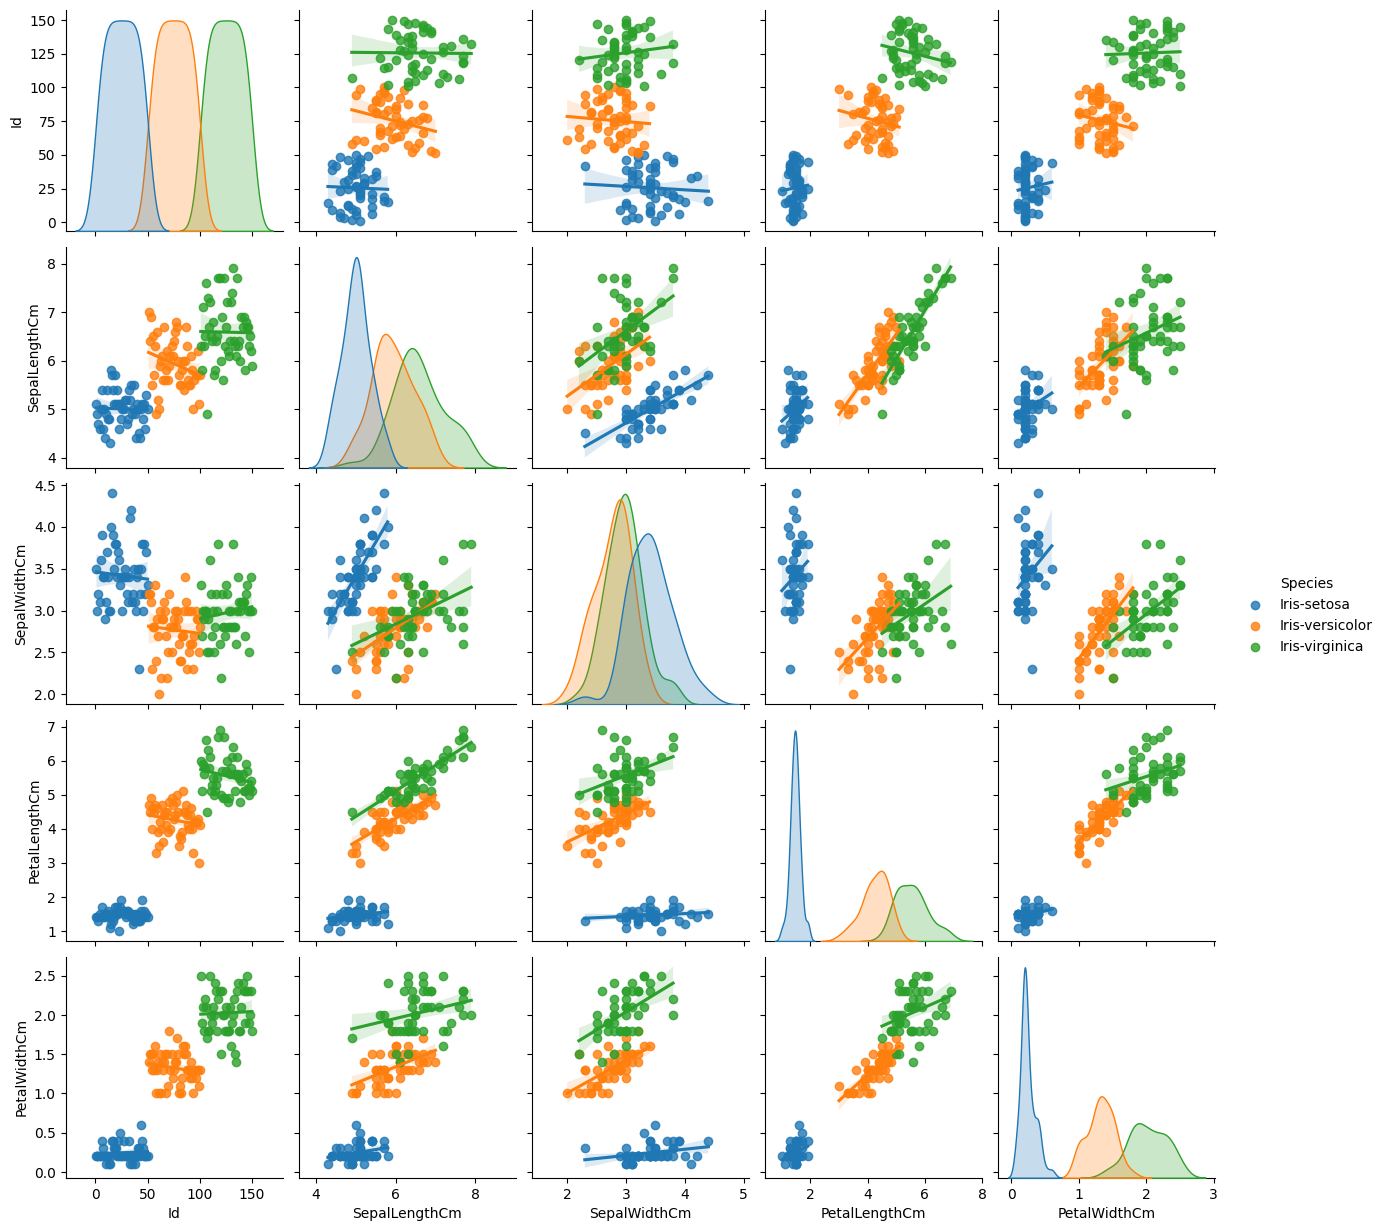

In [55]:
sns.pairplot(df, kind="reg", diag_kind="kde", hue="Species")
plt.show()

# Splitting the data into Test and Train

In [56]:
y = df.Species

In [57]:
df.drop(labels="Species", axis = 1 ,inplace= True)

In [58]:
df.drop(labels='Id', axis= 1, inplace= True)

In [59]:
x = df

In [60]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [61]:
x_train.shape

(120, 4)

In [62]:
x_test.shape

(30, 4)

In [63]:
y_train.shape

(120,)

In [64]:
y_test.shape

(30,)

# Let's apply Scaling

In [65]:
con_cols = [col for col in x.columns if x[col].dtype != "object"]

In [66]:
con_cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc = StandardScaler()
x_train[con_cols] = sc.fit_transform(x_train)

In [69]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,-1.473937,1.220379,-1.563987,-1.309484
15,-0.133071,3.020017,-1.277280,-1.042922
65,1.085898,0.095606,0.385621,0.289886
11,-1.230143,0.770470,-1.219939,-1.309484
42,-1.717731,0.320560,-1.391963,-1.309484
...,...,...,...,...
71,0.354517,-0.579258,0.156255,0.156605
106,-1.108246,-1.254122,0.442962,0.689728
14,-0.011174,2.120198,-1.449304,-1.309484
92,-0.011174,-1.029168,0.156255,0.023324


In [70]:
x_test[con_cols] = sc.transform(x_test[con_cols])

In [71]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,0.354517,-0.579258,0.557645,0.023324
18,-0.133071,1.670289,-1.162597,-1.176203
118,2.304867,-1.029168,1.819157,1.489413
78,0.232620,-0.354304,0.442962,0.423166
76,1.207795,-0.579258,0.614987,0.289886
31,-0.498762,0.770470,-1.277280,-1.042922
64,-0.254968,-0.354304,-0.073110,0.156605
141,1.329692,0.095606,0.787011,1.489413
68,0.476414,-1.928987,0.442962,0.423166
82,-0.011174,-0.804213,0.098914,0.023324


In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [77]:
y_train = le.fit_transform(y_train)

In [78]:
y_test = le.transform(y_test)

# Lets build the neural network from scratch